In [1]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=4ed55b91d94236323a73064590f991628178ac3c4ad400d8ab226356c330bd3f
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from langdetect import detect

import re
from nltk.stem import PorterStemmer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tải dữ liệu từ WordNet
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
data = pd.read_csv('finalData_ranked.csv')
data

,Unnamed: 0,ChannelID,ChannelRank,ChannelName,VideoID,VideoRank,Title,Topic,Duration,PublishedAt,Views,Likes,NumComments,Date,Description,Tag,Genre,Days,Ratio
0,0,UC7qiJAwCaWY57G0TsO_M6Lw,1,ACV Music Trending,G2G5VS_P8hU,1,TỪNG YÊU (KARAOKE REMIX) - PHAN DUY ANH | BẢN ...,"Electronic_music, Music",309.0,2019-07-02T09:38:38Z,12377982,33330.0,511.0,2024-02-27,TỪNG YÊU (KARAOKE REMIX) - PHAN DUY ANH | BẢN ...,"từng yêu, tung yeu, từng yêu remix, tung yeu r...",Music,1706,7255.558030
1,1,UC7qiJAwCaWY57G0TsO_M6Lw,1,ACV Music Trending,P8HYaujOmCM,1,Nhạc Trẻ Mới Hay Nhất 2020 - Liên Khúc Nhạc Tr...,"Music, Pop_music, Soul_music",4788.0,2020-11-13T09:16:57Z,3522600,12827.0,355.0,2024-02-27,Nhạc Trẻ Mới Hay Nhất 2020 - Liên Khúc Nhạc Tr...,"nhạc trẻ, nhac tre, nhạc trẻ mới, nhac tre moi...",Music,1206,2920.895522
2,2,UC7qiJAwCaWY57G0TsO_M6Lw,1,ACV Music Trending,T957OV_tAWw,1,NHẠC TRẺ REMIX HAY NHẤT 2023 - LIÊN KHÚC NHẠC ...,"Electronic_music, Music, Pop_music",4687.0,2023-05-03T03:11:06Z,744248,0.0,52.0,2024-02-27,NHẠC TRẺ REMIX HAY NHẤT 2023 - LIÊN KHÚC NHẠC ...,"acv trending, acv, nhac tre moi nhat, nhạc trẻ...",Music,305,2440.157377
3,3,UC7qiJAwCaWY57G0TsO_M6Lw,1,ACV Music Trending,gb3DgipefjY,1,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,"Electronic_music, Music",5840.0,2022-03-16T10:03:19Z,5646678,0.0,335.0,2024-02-27,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,"acv trending, acv, nhạc trẻ, nhac tre, nhạc tr...",Music,718,7864.454039
4,4,UC7qiJAwCaWY57G0TsO_M6Lw,1,ACV Music Trending,kRT4foA6uu4,1,Tuyệt Phẩm RUMBA MOCHIII Nhạc Trẻ Hay Nhất 202...,"Electronic_music, Music",4956.0,2024-01-02T07:00:12Z,266497,2455.0,42.0,2024-02-27,Tuyệt Phẩm RUMBA MOCHIII Nhạc Trẻ Hay Nhất 202...,"acv trending, nhac tre moi nhat, nhạc trẻ 2023...",Music,61,4368.803279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38833,38833,UCI9Mo77KezQXp6ITE4yY3qg,3,Winged Wheel Podcast,noH4yTvglmM,3,Winged Wheel Podcast - DRAFT COVERAGE KICKOFF ...,"Ice_hockey, Sport",4981.0,2020-03-16T04:33:12Z,707,31.0,8.0,2024-03-02,With the NHL (and the rest of the world) under...,"Detroit Red Wings, Podcast, NHL, Hockey, Red W...",Podcast,1448,0.488260
38834,38834,UCI9Mo77KezQXp6ITE4yY3qg,3,Winged Wheel Podcast,q-sltcYFzJo,3,Winged Wheel Podcast - ALL STARS ft. JEFF MARE...,Entertainment,4254.0,2020-01-27T13:00:10Z,1048,56.0,22.0,2024-03-02,Tune in as we are joined by Jeff Marek of Spor...,"Detroit Red Wings, Podcast, NHL, Hockey, Red W...",Podcast,1497,0.700067
38835,38835,UCI9Mo77KezQXp6ITE4yY3qg,3,Winged Wheel Podcast,vjTriSSM7xA,3,The Winged Wheel Podcast - NHL vs NHLPA - Dec....,"Ice_hockey, Sport",4378.0,2020-12-07T05:48:28Z,825,38.0,18.0,2024-03-02,The NHL and NHLPA continue to butt heads over ...,"Detroit Red Wings, Podcast, NHL, Hockey, Red W...",Podcast,1182,0.697970
38836,38836,UCntVA_hXbqPgy_5jRz5219w,3,Yarnmugs Podcast,Q0RfYBbOfoo,3,EDITED VERSION - Vlogmas with Yarnmugs 2022 - ...,"Hobby, Lifestyle_(sociology)",273.0,2022-12-28T08:20:13Z,363,63.0,11.0,2024-02-20,No Description,No Tag,Podcast,431,0.842227


In [5]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import wordnet as wn
from collections import defaultdict




def preprocess_title(title):
    # Chuyển đổi tiêu đề thành chữ thường
    title = title.lower()

    # Loại bỏ các ký tự không phải chữ cái và không phải số
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)

    # Tokenize tiêu đề
    tokens = word_tokenize(title)

    # Loại bỏ stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming các từ
    porter = PorterStemmer()
    tokens = [porter.stem(token) for token in tokens]

    return tokens

def detect_language(title):
    try:
        lang = detect(title)
        return lang
    except:
        return 'unknown'

# Phân tích tiêu đề của video cho từng genre, từng channel rank và video rank
def analyze_titles(data):
    analyzed_data = {}

    genres = data['Genre'].unique()
    for genre in genres:
        analyzed_data[genre] = {}

        channel_ranks = data[data['Genre'] == genre]['ChannelRank'].unique()
        for channel_rank in channel_ranks:
            analyzed_data[genre][channel_rank] = {}

            channel_data = data[(data['Genre'] == genre) & (data['ChannelRank'] == channel_rank)]
            video_ranks = channel_data['VideoRank'].unique()
            for video_rank in video_ranks:
                video_data = channel_data[channel_data['VideoRank'] == video_rank]
            # video_data = data[(data['Genre'] == genre) & (data['ChannelRank'] == channel_rank)]

                english_titles = []

                # Xác định ngôn ngữ và chia tiêu đề thành tiếng Anh và không phải tiếng Anh
                for title in video_data['Title']:
                    lang = detect_language(title)
                    if lang == 'en':
                        english_titles.append(title)

                # Áp dụng hàm preprocess_title cho mỗi tiêu đề tiếng Anh
                tokenized_titles = [preprocess_title(title) for title in english_titles]

                # Đếm tần suất xuất hiện của từ trong tất cả các tiêu đề tiếng Anh
                all_tokens = [token for title_tokens in tokenized_titles for token in title_tokens]
                word_freq = Counter(all_tokens)

                # Khởi tạo SentimentIntensityAnalyzer
                sia = SentimentIntensityAnalyzer()

                # Khởi tạo Counter để đếm số lượng từ tích cực, tiêu cực và trung tính
                positive_words = Counter()
                negative_words = Counter()

                for word, count in word_freq.items():
                    # Phân loại tính chất của từ
                    sentiment_score = sia.polarity_scores(word)['compound']
                    if sentiment_score >= 0.2:
                        # Tích cực
                        positive_words[word] += count
                    elif sentiment_score < -0.2:
                        # Tiêu cực
                        negative_words[word] += count

                # Tính tổng số lượng từ của mỗi loại
                total_positive = sum(positive_words.values())
                total_negative = sum(negative_words.values())

                # Tính tỷ lệ giữa các từ tích cực, tiêu cực và trung tính
                positive_ratio = total_positive / (total_positive + total_negative)
                negative_ratio = total_negative / (total_positive + total_negative)

                # Lưu kết quả vào dictionary
                analyzed_data[genre][channel_rank][video_rank] = {
                    'positive_words': positive_words,
                    'negative_words': negative_words,
                    'positive_ratio': positive_ratio,
                    'negative_ratio': negative_ratio,
                }

    return analyzed_data

# Phân tích tiêu đề của video cho từng genre, từng channel rank và video rank
analyzed_data = analyze_titles(data)


In [6]:
analyzed_data

{'Music': {1: {1: {'positive_words': Counter({'love': 31,
             'clean': 3,
             'kind': 1,
             'good': 4,
             'attract': 5,
             'protect': 1,
             'wealth': 4,
             'bless': 2,
             'god': 5,
             'thank': 3,
             'wish': 2,
             'true': 1,
             'save': 1,
             'kiss': 1,
             'relax': 103,
             'help': 2,
             'best': 27,
             'like': 5,
             'relief': 24,
             'calm': 33,
             'boost': 5,
             'greatest': 5,
             'cute': 8,
             'super': 79,
             'top': 8,
             'dream': 4,
             'brave': 1,
             'grand': 7,
             'yay': 1,
             'sweet': 1,
             'great': 1,
             'fun': 3,
             'play': 4,
             'friendship': 15,
             'friend': 3,
             'fair': 1,
             'fit': 1,
             'fame': 1,
             'hero'

Lưu những từ đếm được vào 1 file `word_count.csv`

In [7]:
import pandas as pd

# Tạo list để lưu dữ liệu
data_list = []

# Duyệt qua từng genre
for genre, channel_data in analyzed_data.items():
    # Duyệt qua từng channel rank
    for channel_rank, video_data in channel_data.items():
        # Duyệt qua từng video rank
        for video_rank, word_data in video_data.items():
            # Duyệt qua từ tích cực
            for word, count in word_data['positive_words'].items():
                data_list.append([genre, channel_rank, video_rank, word, count, 1])
            # Duyệt qua từ tiêu cực
            for word, count in word_data['negative_words'].items():
                data_list.append([genre, channel_rank, video_rank, word, count, 0])

# Tạo DataFrame từ list dữ liệu
df = pd.DataFrame(data_list, columns=['Genre', 'ChannelRank', 'VideoRank', 'Word', 'Counter', 'pos_neg'])

# Xuất DataFrame ra file CSV
df.to_csv('word_count.csv', index=False)


In [8]:
analyzed = pd.read_csv('word_count.csv')
analyzed

,Genre,ChannelRank,VideoRank,Word,Counter,pos_neg
0,Music,1,1,love,31,1
1,Music,1,1,clean,3,1
2,Music,1,1,kind,1,1
3,Music,1,1,good,4,1
4,Music,1,1,attract,5,1
...,...,...,...,...,...,...
2992,Podcast,3,3,reject,1,0
2993,Podcast,3,3,dirt,1,0
2994,Podcast,3,3,hater,1,0
2995,Podcast,3,3,lawsuit,1,0


## Top 10 các từ phổ biến nhất trong tiêu đề của từng video rank

In [9]:
# Duyệt qua từng genre
for genre, channel_data in analyzed_data.items():
    print(f"Genre: {genre}")
    print("--------------------------------------------------")

    # Duyệt qua từng channel rank
    for channel_rank, video_data in channel_data.items():
        print(f"Channel Rank: {channel_rank}")
        print("Top 10 words:")

        # Tạo một Counter mới để tổng hợp các từ từ cả positive_words và negative_words
        all_words = Counter()

        # Duyệt qua từng video rank
        for video_rank, word_data in video_data.items():
            all_words.update(word_data['positive_words'])
            all_words.update(word_data['negative_words'])

        # In ra top 10 từ xuất hiện nhiều nhất
        for word, count in all_words.most_common(10):
            print(f"{word}: {count}")

        print("--------------------------------------------------")



Genre: Music
--------------------------------------------------
Channel Rank: 1
Top 10 words:
relax: 800
stress: 318
best: 281
love: 277
relief: 212
calm: 194
depress: 156
super: 89
attract: 87
top: 87
--------------------------------------------------
Channel Rank: 2
Top 10 words:
relax: 1030
best: 838
popular: 341
stress: 299
relief: 248
top: 212
calm: 183
love: 180
greatest: 175
sad: 159
--------------------------------------------------
Channel Rank: 3
Top 10 words:
best: 29
love: 24
stop: 22
relax: 18
devil: 13
free: 12
calm: 11
super: 11
fun: 11
honor: 11
--------------------------------------------------
Genre: Podcast
--------------------------------------------------
Channel Rank: 1
Top 10 words:
love: 36
fight: 35
truth: 32
like: 28
best: 23
good: 21
prison: 20
war: 19
worst: 19
stop: 19
--------------------------------------------------
Channel Rank: 2
Top 10 words:
best: 170
problem: 81
love: 79
like: 72
well: 70
good: 63
truth: 63
win: 61
ez: 61
broken: 61
----------------

## Trực quan Word Cloud top 10 từ cho mỗi channel rank của mỗi genre

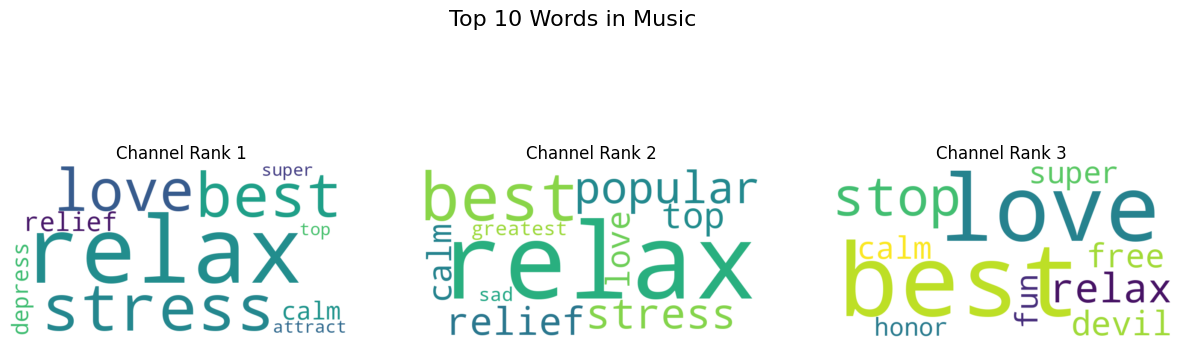

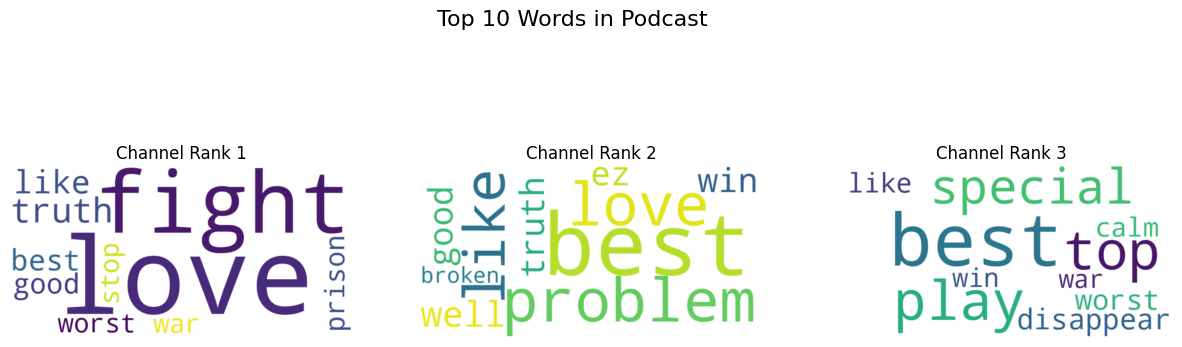

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Duyệt qua từng genre
for genre, channel_data in analyzed_data.items():
    # Tạo một subplot mới cho mỗi genre
    fig, axs = plt.subplots(1, len(channel_data), figsize=(15, 5))
    fig.suptitle(f"Top 10 Words in {genre}", fontsize=16)

    # Duyệt qua từng channel rank
    for i, (channel_rank, video_data) in enumerate(channel_data.items()):
        # Tạo một Counter mới để tổng hợp các từ từ cả positive_words và negative_words
        all_words = Counter()

        # Duyệt qua từng video rank
        for _, word_data in video_data.items():
            all_words.update(word_data['positive_words'])
            all_words.update(word_data['negative_words'])

        # Lấy top 10 từ xuất hiện nhiều nhất
        top_10_words = dict(all_words.most_common(10))

        # Tạo word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_10_words)

        # Vẽ word cloud
        axs[i].imshow(wordcloud, interpolation='bilinear')
        axs[i].set_title(f"Channel Rank {channel_rank}")
        axs[i].axis('off')

    plt.show()


In [11]:
!pip install squarify

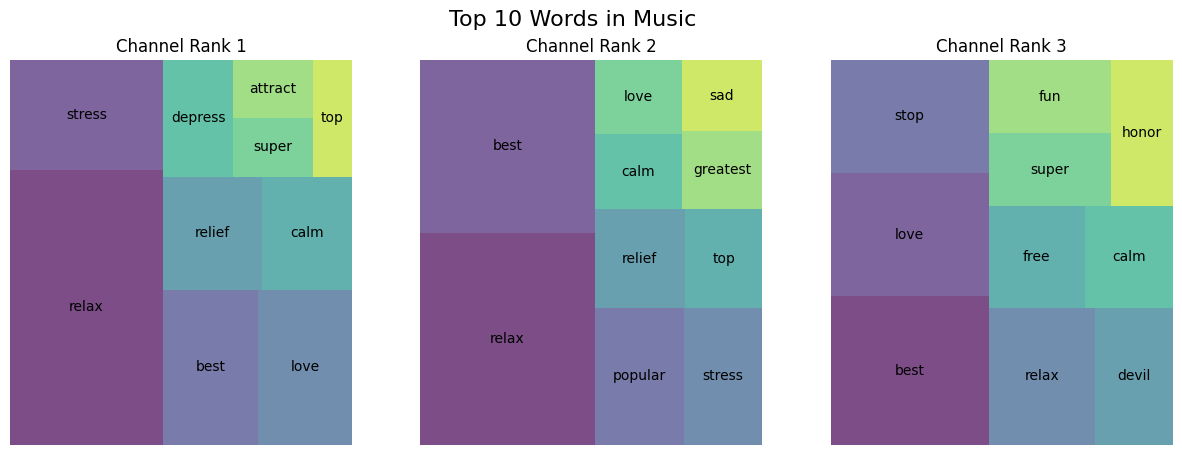

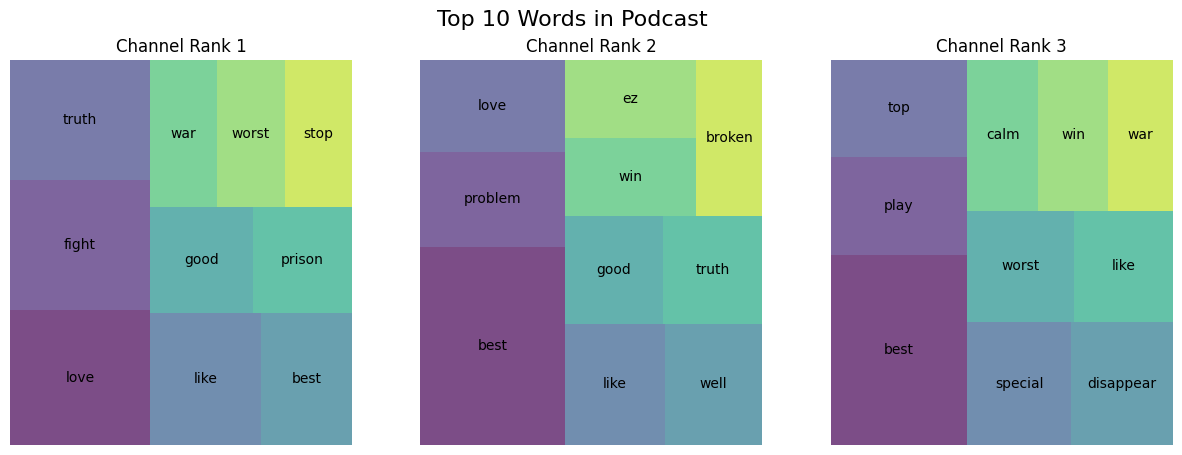

In [12]:
import matplotlib.pyplot as plt
import squarify

# Duyệt qua từng genre
for genre, channel_data in analyzed_data.items():
    # Tạo một subplot mới cho mỗi genre
    fig, axs = plt.subplots(1, len(channel_data), figsize=(15, 5))
    fig.suptitle(f"Top 10 Words in {genre}", fontsize=16)

    # Duyệt qua từng channel rank
    for i, (channel_rank, video_data) in enumerate(channel_data.items()):
        # Tạo một Counter mới để tổng hợp các từ từ cả positive_words và negative_words
        all_words = Counter()

        # Duyệt qua từng video rank
        for _, word_data in video_data.items():
            all_words.update(word_data['positive_words'])
            all_words.update(word_data['negative_words'])

        # Lấy top 10 từ xuất hiện nhiều nhất
        top_10_words = dict(all_words.most_common(10))

        # Tạo các dữ liệu để vẽ tree map
        sizes = list(top_10_words.values())
        labels = list(top_10_words.keys())
        colors = [plt.cm.viridis(i/len(labels)) for i in range(len(labels))]

        # Vẽ tree map
        axs[i].set_title(f"Channel Rank {channel_rank}")
        squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, ax=axs[i])
        axs[i].axis('off')

    plt.show()

